In [ ]:
 !pip install ultralytics

In [ ]:
import os
import shutil
import random
!pip install tqdm --upgrade
from tqdm.notebook import tqdm

Conntect to google drive to have accessibility to dataset

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Directory of train, valid and test set.

In [ ]:
train_path_image = '/content/drive/My Drive/yolo8/data/yolo_data/train/images'
train_path_label = '/content/drive/My Drive/yolo8/data/yolo_data/train/labels'
val_path_image = '/content/drive/My Drive/yolo8/data/yolo_data/valid/images'
val_path_label = '/content/drive/My Drive/yolo8/data/yolo_data/val/labels'
test_path_image = '/content/drive/My Drive/yolo8/data/yolo_data/test/images'
test_path_label = '/content/drive/My Drive/yolo8/data/yolo_data/test/labels'

In [ ]:
train_path_image

'/content/drive/My Drive/yolo8/data/yolo_data/train/images'

Updating yaml file.
Defining vehicle classes: ['bus', 'car', 'motor', 'truck']

In [ ]:

data_yaml_content = f"""
train: {train_path_image}
val: {val_path_image}

nc: 4
names: ['bus', 'car', 'motor', 'truck']
"""

data_yaml_path = '/content/drive/My Drive/yolo8/data/yolo_data/data.yaml'
with open(data_yaml_path, 'w') as file:
    file.write(data_yaml_content)

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.6/78.2 GB disk)


training yolo version yolo8s.pt on train mode on custom dataset, 20 ephos and batch=8
results will be saved on: '/content/drive/My Drive/yolo8/output' name=vehicle

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/My Drive/yolo8/data/yolo_data/data.yaml' epochs=20 batch=8 project='/content/drive/My Drive/yolo8/output' name=vehicle

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/My Drive/yolo8/data/yolo_data/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/yolo8/output, name=vehicle6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

Predict model on test set with confidence of 0.55

In [ ]:
!yolo task=detect mode=predict model='/content/drive/My Drive/yolo8/output/vehicle6/weights/best.pt' conf=0.55 source='/content/drive/My Drive/yolo8/data/yolo_data/test/images'

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/122 /content/drive/My Drive/yolo8/data/yolo_data/test/images/27260-362770008_small_mp4-0001_jpg.rf.3e348b82258bae377ee736d26d50f06b.jpg: 640x640 2 cars, 16.4ms
image 2/122 /content/drive/My Drive/yolo8/data/yolo_data/test/images/27260-362770008_small_mp4-0004_jpg.rf.cf340b6655278a3f730e38164587900e.jpg: 640x640 3 cars, 16.5ms
image 3/122 /content/drive/My Drive/yolo8/data/yolo_data/test/images/RoadTrafficVideo-1-_mp4-0015_jpg.rf.c15e0d53cb5acd7a6e5384e120bcb0c0.jpg: 640x640 4 cars, 16.4ms
image 4/122 /content/drive/My Drive/yolo8/data/yolo_data/test/images/RoadTrafficVideo-1-_mp4-0021_jpg.rf.a17552c9b661a491bbd3847487837014.jpg: 640x640 8 cars, 16.3ms
image 5/122 /content/drive/My Drive/yolo8/data/yolo_data/test/images/RoadTrafficVideo-1-_mp4-0025_jpg.rf.b56bc62c134bab0e56ad19724b74026a.jpg: 640x640 6 cars, 1 tr

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r /content/runs/detect/predict3/ /content/drive/MyDrive/yolo8/predict_output

In [ ]:
!pip install numpy pandas matplotlib scikit-learn torch

In [64]:
pip install torch torchvision pycocotools


In [66]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.9 MB/s eta 0:00:00


In [69]:
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np



In [74]:
from ultralytics import YOLO
trained_model_path = '/content/drive/My Drive/yolo8/output/vehicle6/weights/best.pt'
model = YOLO(trained_model_path)
metric=model.val()

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/110t41r4EoKuyN01SwJ331fo-aOWikibS/yolo8/data/yolo_data/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]


                   all        127       1255      0.854      0.751        0.8      0.508
                   bus         18         18      0.683      0.389      0.434       0.23
                   car        115        787      0.841      0.802      0.886      0.587
                 motor         57        338      0.965      0.888      0.957       0.55
                 truck         79        112      0.928      0.927      0.922      0.668
Speed: 2.9ms preprocess, 14.0ms inference, 0.0ms loss, 14.3ms postprocess per image
Results saved to runs/detect/val7


In [75]:
metric

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799902401540>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


**Results**

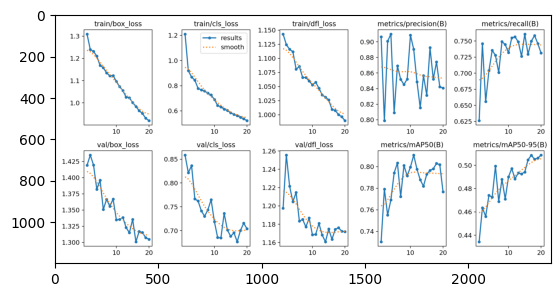

In [14]:
imgr = Image.open('/content/drive/My Drive/yolo8/output/vehicle6/results.png')
plt.imshow(imgr)

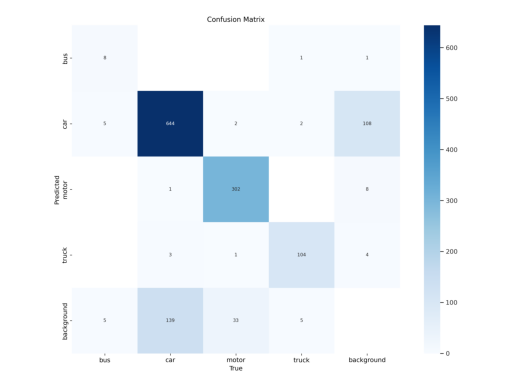

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img1 = Image.open('/content/drive/My Drive/yolo8/output/vehicle6/confusion_matrix.png')

plt.imshow(img1)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


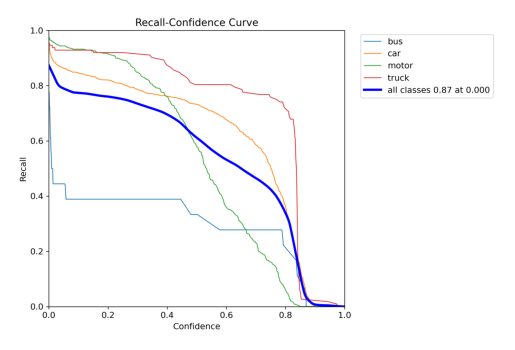

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/My Drive/yolo8/output/vehicle6/R_curve.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


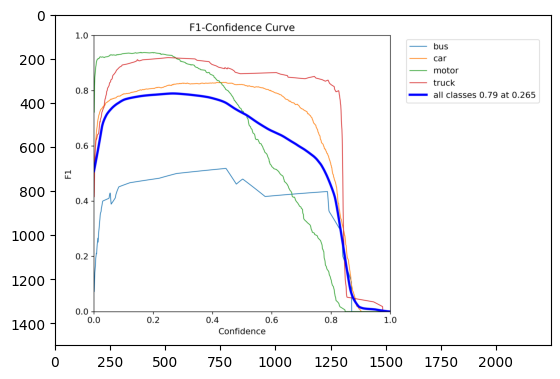

In [10]:
img2 = Image.open('/content/drive/My Drive/yolo8/output/vehicle6/F1_curve.png')
plt.imshow(img2)

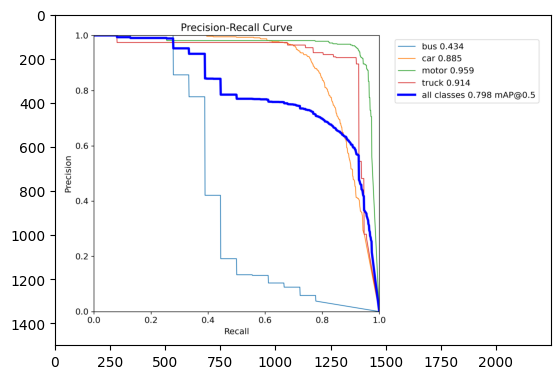

In [12]:
img3 = Image.open('/content/drive/My Drive/yolo8/output/vehicle6/PR_curve.png')
plt.imshow(img3)

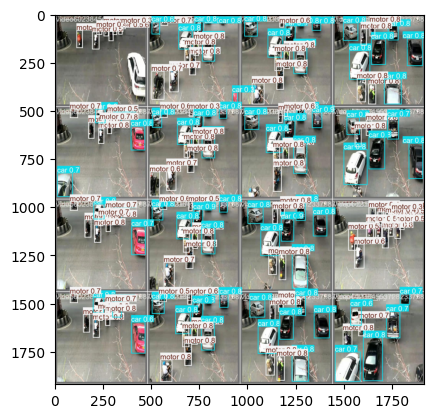

In [15]:
imgp = Image.open('/content/drive/My Drive/yolo8/output/vehicle6/val_batch2_pred.jpg')
plt.imshow(imgp)